**Overlay a GPX route on top of an OSM map using Folium**

In [1]:
import folium 
import gpxpy
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from xml.etree import ElementTree as ET
from xml.dom import minidom
import json
import time
import math  
from IPython.core import display as ICD

def overlayGPX(gpxData, zoom):
    '''
    overlay a gpx route on top of an OSM map using Folium
    some portions of this function were adapted
    from this post: https://stackoverflow.com/questions/54455657/
    how-can-i-plot-a-map-using-latitude-and-longitude-data-in-python-highlight-few
    '''
    gpx_file = open(gpxData, 'r')
    gpx = gpxpy.parse(gpx_file)
    points = []
    for track in gpx.tracks:
        for segment in track.segments:        
            for point in segment.points:
                points.append(tuple([point.latitude, point.longitude]))
    latitude = sum(p[0] for p in points)/len(points)
    longitude = sum(p[1] for p in points)/len(points)
    myMap = folium.Map(location=[latitude,longitude],zoom_start=zoom)
    folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(myMap)
    return (myMap)

def plotElevation(gpxData):
    '''
    Plot elevation profile from a GPX route
    Note that this function was adapted from
    https://www.geodose.com/2018/04/create-gpx-tracking-file-visualizer-python.html
    '''
    #READ GPX FILE
    data=open(filePath)
    xmldoc = minidom.parse(data)
    track = xmldoc.getElementsByTagName('trkpt')
    elevation=xmldoc.getElementsByTagName('ele')
    datetime=xmldoc.getElementsByTagName('time')
    n_track=len(track)
    #PARSE GPX FILE
    lon_list=[]
    lat_list=[]
    h_list=[]
    time_list=[]
    for s in range(n_track):
        lon,lat=track[s].attributes['lon'].value,track[s].attributes['lat'].value
        elev=elevation[s].firstChild.nodeValue
        lon_list.append(float(lon))
        lat_list.append(float(lat))
        h_list.append(float(elev)*3.28084) # convert meters to feet
        # PARSING TIME ELEMENT
        dt=datetime[s].firstChild.nodeValue
        time_split=dt.split('T')
        hms_split=time_split[1].split(':')
        time_hour=int(hms_split[0])
        time_minute=int(hms_split[1])
        time_second=int(hms_split[2].split('Z')[0])
        total_second=time_hour*3600+time_minute*60+time_second
        time_list.append(total_second)
    #DEFINE HELPER FUNCTIONS
    def geo2cart(lon,lat,h):
        a=6378137 #WGS 84 Major axis
        b=6356752.3142 #WGS 84 Minor axis
        e2=1-(b**2/a**2)
        N=float(a/math.sqrt(1-e2*(math.sin(math.radians(abs(lat)))**2)))
        X=(N+h)*math.cos(math.radians(lat))*math.cos(math.radians(lon))
        Y=(N+h)*math.cos(math.radians(lat))*math.sin(math.radians(lon))
        return X,Y
    def distance(x1,y1,x2,y2):
        d=math.sqrt((x1-x2)**2+(y1-y2)**2)
        d=d/1609.34 # convert meters to miles
        return d
    #POPULATE DISTANCE LIST
    d_list=[0.0]
    l=0
    for k in range(n_track-1):
        if k<(n_track-1):
            l=k+1
        else:
            l=k
        XY0=geo2cart(lon_list[k],lat_list[k],h_list[k])
        XY1=geo2cart(lon_list[l],lat_list[l],h_list[l])   
        #DISTANCE
        d=distance(XY0[0],XY0[1],XY1[0],XY1[1])
        sum_d=d+d_list[-1]
        d_list.append(sum_d)
    #PLOT TRACK
    f,(track,elevation)=plt.subplots(1,2)
    f.set_figheight(4) 
    f.set_figwidth(12) 
    plt.subplots_adjust(hspace=0.5)
    track.plot(lon_list,lat_list,'k')
    track.set_ylabel("Latitude")
    track.set_xlabel("Longitude")
    track.set_title("Route Traveled")
    #PLOT ELEVATION PROFILE
    base_reg=9000
    elevation.plot(d_list,h_list)
    elevation.fill_between(d_list,h_list,base_reg,alpha=0.1)
    elevation.set_title("Elevation Profile")
    elevation.set_xlabel("Distance (miles)")
    elevation.set_ylabel("Elevation (feet)")
    elevation.grid()
    
baseDir = '../input/ptm strava data/PTM Strava Data/'

Longs Peak, Colorado

None

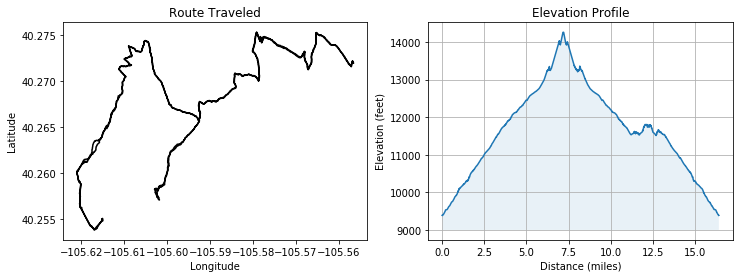

In [2]:
fileName = 'hike/Colorado_Longs_Peak_and_Chasm_Lake_Hike.gpx'
filePath = os.path.join(baseDir,fileName)
ICD.display(overlayGPX(filePath,14))
ICD.display(plotElevation(filePath))

Mt Oxford, Colorado

None

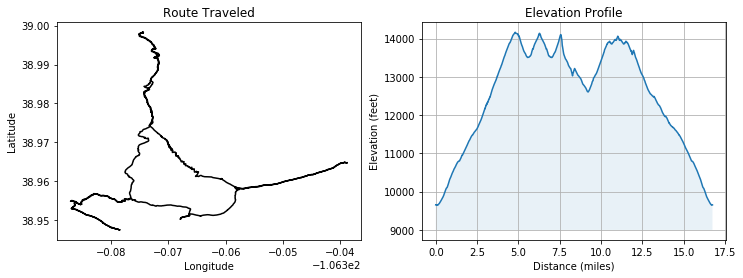

In [3]:
fileName = 'hike/Colorado_Belford_Oxford_and_Missouri_Mountains_Hike.gpx'
filePath = os.path.join(baseDir,fileName)
ICD.display(overlayGPX(filePath, 14))
ICD.display(plotElevation(filePath))

Ghorepani, Nepal

None

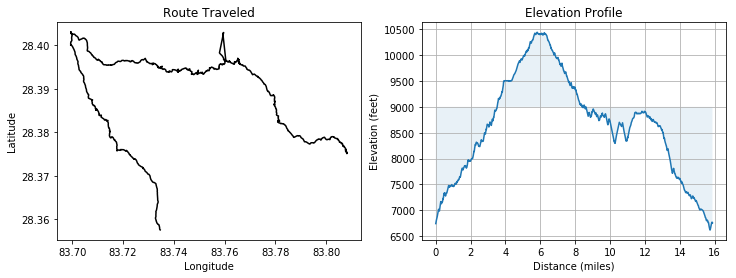

In [4]:
fileName = 'hike/Berenthanti_Ghorepani_Ghandruk_Loop_Hike_Day_2_of_3_.gpx'
filePath = os.path.join(baseDir,fileName)
ICD.display(overlayGPX(filePath, 12))
ICD.display(plotElevation(filePath))